数据集已保存至: C:\Users\wy289\Sklearn\Decision Tree\anomaly_data_1000_100.csv
正常样本: 1000, 异常样本: 100


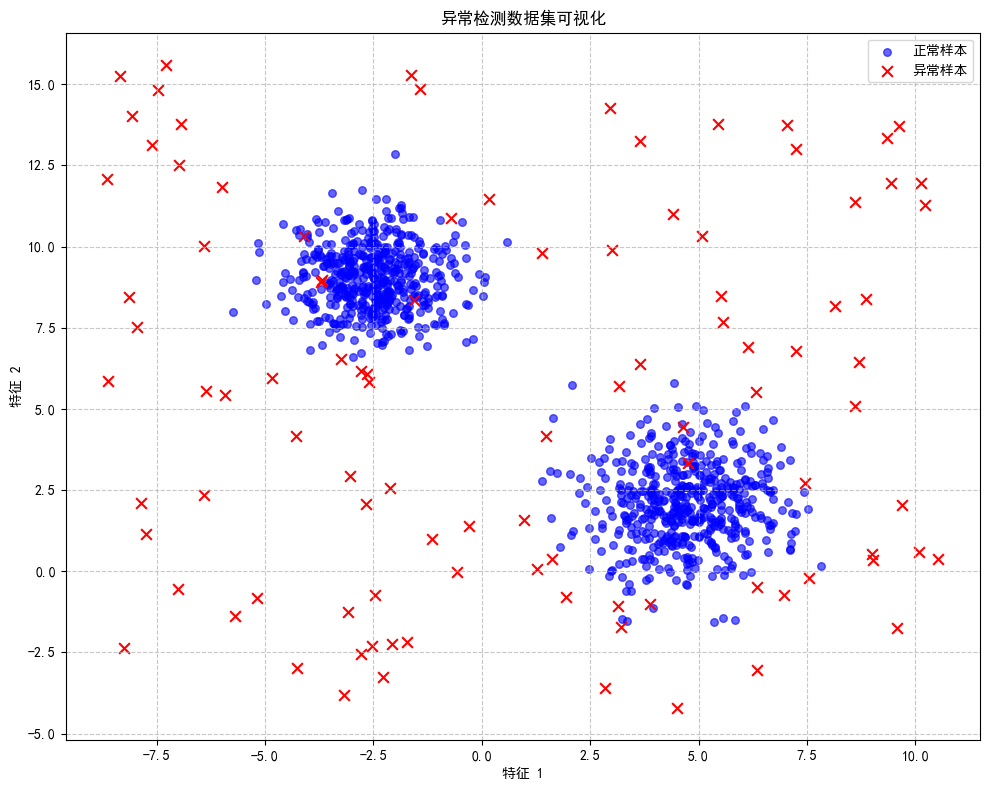

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import os
from pathlib import Path

plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False

def generate_anomaly_dataset(n_samples=1000, n_anomalies=100, random_state=42, output_dir=None):
    """
    生成用于异常检测的二维数据集并保存为CSV文件
    
    参数:
    n_samples: 正常样本数量
    n_anomalies: 异常样本数量
    random_state: 随机种子，确保结果可重现
    output_dir: 输出CSV文件的目录，默认为当前Jupyter工作目录
    
    返回:
    数据集路径
    """
    # 如果未指定输出目录，使用当前Jupyter笔记本所在目录
    if output_dir is None:
        output_dir = Path.cwd()
    else:
        output_dir = Path(output_dir)
    
    # 创建输出目录（如果不存在）
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # 生成正常数据点（两个聚类）
    X_normal, _ = make_blobs(
        n_samples=n_samples, 
        centers=2, 
        cluster_std=[1.0, 1.2],
        random_state=random_state
    )
    
    # 生成异常数据点（随机分布在正常数据范围之外）
    np.random.seed(random_state)
    x_min, x_max = X_normal[:, 0].min() - 3, X_normal[:, 0].max() + 3
    y_min, y_max = X_normal[:, 1].min() - 3, X_normal[:, 1].max() + 3
    
    X_anomaly = np.random.uniform(
        low=[x_min, y_min], 
        high=[x_max, y_max], 
        size=(n_anomalies, 2)
    )
    
    # 标记正常和异常样本
    y_normal = np.zeros(n_samples, dtype=int)
    y_anomaly = np.ones(n_anomalies, dtype=int)
    
    # 合并数据集
    X = np.vstack([X_normal, X_anomaly])
    y = np.concatenate([y_normal, y_anomaly])
    
    # 创建DataFrame
    df = pd.DataFrame({
        'feature1': X[:, 0],
        'feature2': X[:, 1],
        'anomaly': y
    })
    
    # 保存为CSV文件
    csv_path = output_dir / f'anomaly_data_{n_samples}_{n_anomalies}.csv'
    df.to_csv(csv_path, index=False)
    
    print(f"数据集已保存至: {csv_path}")
    print(f"正常样本: {n_samples}, 异常样本: {n_anomalies}")
    
    return str(csv_path)

def visualize_dataset(csv_path):
    """可视化生成的数据集"""
    df = pd.read_csv(csv_path)
    
    plt.figure(figsize=(10, 8))
    normal = df[df['anomaly'] == 0]
    anomalies = df[df['anomaly'] == 1]
    
    plt.scatter(normal['feature1'], normal['feature2'], 
                c='blue', s=30, label='正常样本', alpha=0.6)
    plt.scatter(anomalies['feature1'], anomalies['feature2'], 
                c='red', s=60, label='异常样本', marker='x')
    
    plt.title('异常检测数据集可视化')
    plt.xlabel('特征 1')
    plt.ylabel('特征 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # 示例：生成1000个正常样本和100个异常样本，保存到当前目录
    csv_path = generate_anomaly_dataset(
        n_samples=1000, 
        n_anomalies=100
    )
    
    # 可视化数据集
    visualize_dataset(csv_path)    